### pandas study

학습 날짜 : 2019년 04월 07일

학습 내용 : pandas 기본 및 join 기능

학습 이유 : 까먹어서

학습 참고
- https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb
- https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb
- https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/03%20-%20Lesson.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [4]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

BabyDataSet = list(zip(names, births))

In [5]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [7]:
df.dtypes

Names     object
Births     int64
dtype: object

In [8]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head()

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


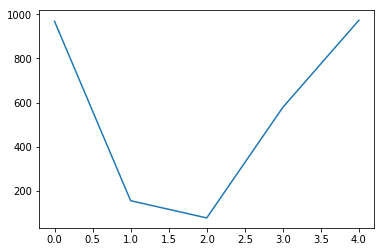

In [9]:
# Create graph
df['Births'].plot()

In [14]:
MaxValue = df['Births'].max()
MaxValue

973

In [12]:
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values
MaxName

array(['Mel'], dtype=object)

In [15]:
# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

In [18]:
# # Add text to graph
# plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
#                  xycoords=('axes fraction', 'data'), textcoords='offset points')

# print("The most popular name")
# df[df['Births'] == df['Births'].max()]

In [19]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

In [22]:
np.random.seed(500)
random_names = [names[np.random.randint(low=0, high=len(names))] for i in range(1000)]

random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [23]:
# The number of births per name for the year 1880
births = [np.random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [24]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [25]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Names     1000 non-null object
Births    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [29]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


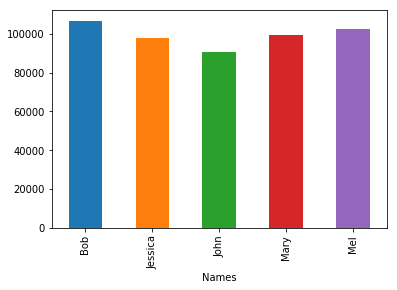

In [30]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)